# House Price Prediction

## Importing Libraries

In [143]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Reading the Data

#### 1. Import

In [144]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each record in the data represents one district

#### 2. Shape

In [145]:
df.shape

(20640, 10)

We can see that the dataset consists of 10 attributes and 20640 records

#### 3. Data Types and null values

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see that nine of the ten attributes are numeric, while one is category, as seen in the result above. Total bedrooms has 20433 non null values, implying that there are null values in this column that must be handled

#### 4. Number ofunique values within Categorical Values

In [147]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Therefore, ocean_proximity is a categorical variable with 5 categories

#### 5. Summary of numeric values 

In [148]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Exploratory Data Analysis

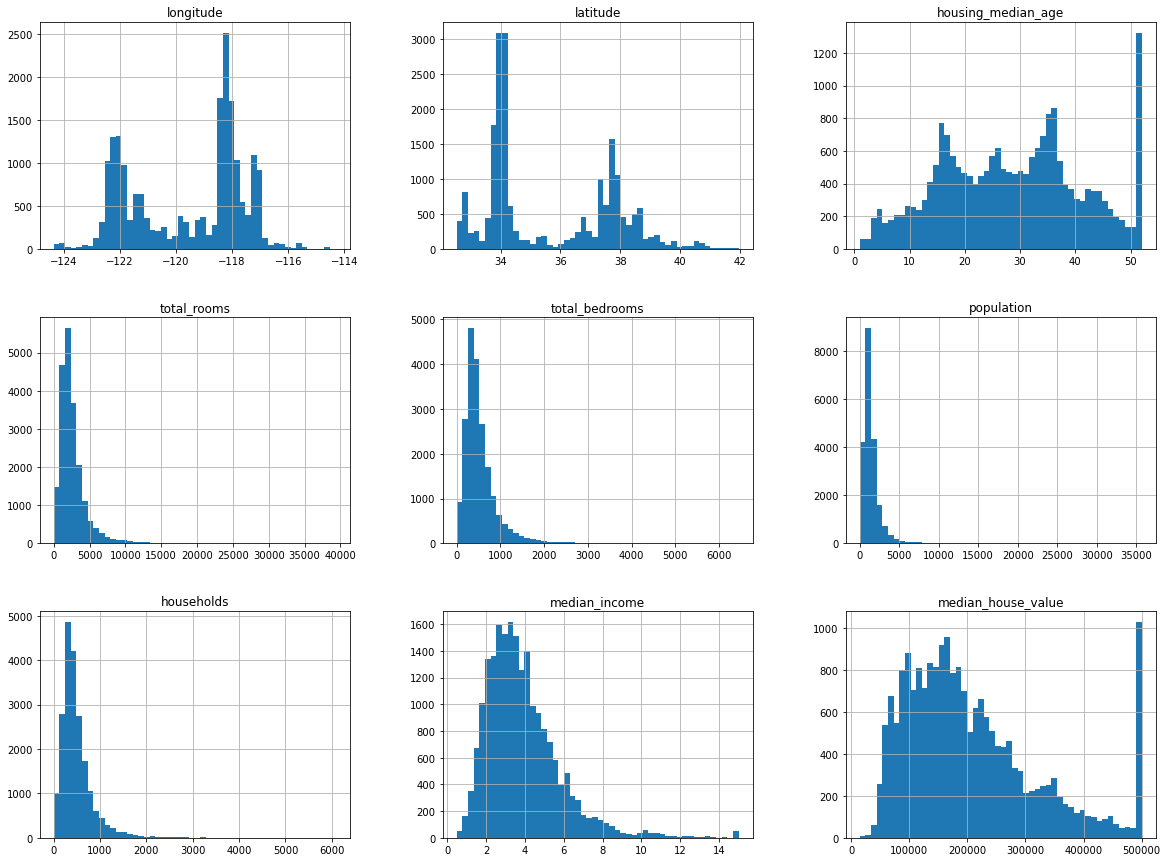

In [149]:
df.hist(bins=50, figsize=(20,15))
plt.show()

We can see that many of these attributes are tail heavy. We can get a clear picture by plotting the box plots

### Train Test Split

Before creating the model we will split the data into train and test subsets. The training data will be used for creating the model whereas test data will be used to check the performance

In [150]:
#Defining a function to split the data
np.random.seed(42) #To generate the same shuffled indices
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

Using the function __split_train_test__ to split the housing data set

In [151]:
train_set, test_set = split_train_test(df, 0.2)
print("length of train set : ",len(train_set))
print("length of test set : ",len(test_set))


length of train set :  16512
length of test set :  4128


According to the data, __median income__ appears to be a good predictor of median price. Because median income is a continuous variable, we can partition it into categories to create homogeneous strata and make it easier to analyze how these categories influence price

<AxesSubplot:>

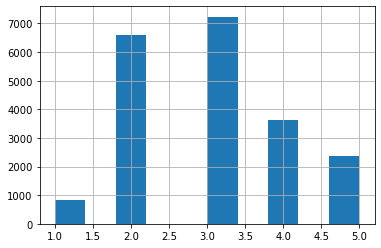

In [152]:
df["income_cat"] = pd.cut(df["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])
#Plotting histogram
df["income_cat"].hist()

Here label = 1 ranges from 1 to 1.5 represents income less than 15,000 USD ,
label = 2 ranges from 1.5 to 3.0 and it represents 15000 USD to 30000 USD

In [153]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


In [154]:
#Checking the split of income category in train data
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [155]:
#Checking the split of income category in test data
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

We can see that the income category in train data is representative of test data on performing sampling bias comparison of stratified versus purely random sampling

Now, we can drop the income_cat variable from the dataset as we will not be using the category to predict the median price

#### Exploratory data analysis with visualizations

In [156]:
housing_df = strat_train_set.copy()

We have been provided with the columns longitude and latitude, this can help us in determining the price based on the area

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

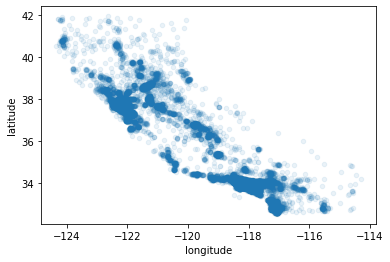

In [157]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.09)

The scatter plot represnts map of californina. The darker regions refer to the dense points i.e. more data 

Checking the price observed in different regions

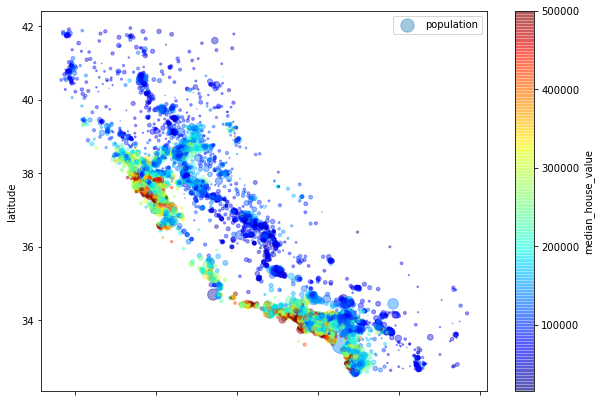

In [158]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing_df["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

The radius of each circle represents
the district’s population and the color represents the price.It can be observed that the prices are higwhere the population is more

#### Identifying correlations

In [159]:
corr_matrix = housing_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

We can see that median income correlates with median housing value the most

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

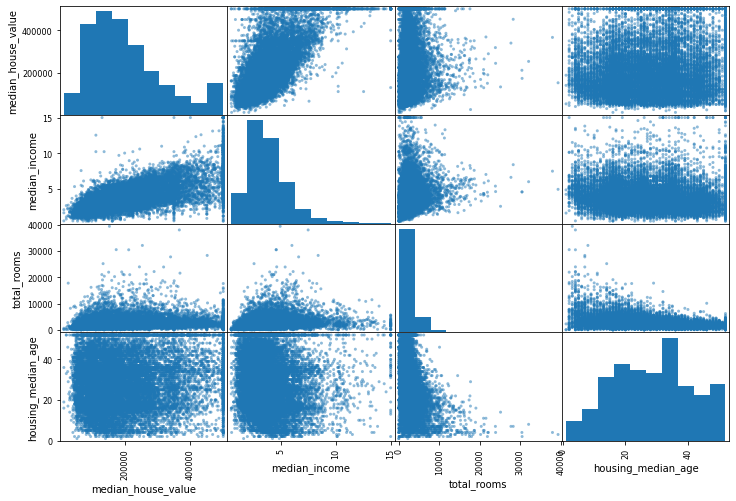

In [160]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing_df[attributes], figsize=(12, 8))

We can observe a strong correlation between median income wrt to median housing value, lets check the scatter plot for it

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

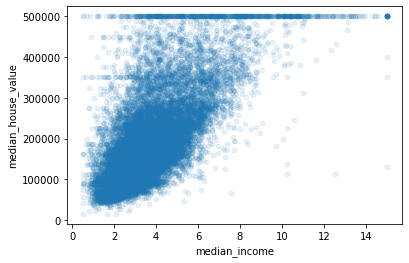

In [161]:
housing_df.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

We can see a strong upward relationship between the two variables, the points are also not very dispersed

### Combining attributes

The variables total rooms and total districts will be more useful if we can derive the rooms_per_household and bedrooms_per_room from it

In [162]:
housing_df["rooms_per_household"] = housing_df["total_rooms"]/housing_df["households"]
housing_df["bedrooms_per_room"] = housing_df["total_bedrooms"]/housing_df["total_rooms"]
housing_df["population_per_household"]=housing_df["population"]/housing_df["households"]

We can now begin with the transformations on attributes, first we will dro[ the dependent variable as we wish to keep it untouched

In [163]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In this dataset, we can handle the null values by: <br>
* Get rid of the corresponding districts. <br>
* Get rid of the whole attribute.<br>
* Set the values to some value (zero, the mean, the median, etc.).

In [164]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Sklearn's Simple imputer finds the median value of the numerical attributes and assigns them wherever the value is null. Ocean proximity is a text attribute and hence we can remove it

In [165]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [166]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [167]:
X = imputer.transform(housing_num)

The result obtained after transforming the data will be in a numpy array, we can put the data back into the dataframe

In [168]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

Now that we have handles the null values which were present in numerical attributes, we will now deal with the categorical attribute. Linear regression works on numerical attributes , lets convert ocean-proximity to text

In [169]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [170]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling

Our dataset might contain features having different sacales, its important to have a standard scale for all the attributes. This can be achieved by using "Min-max scaling" or "standard scaling"

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

Creating a pipeline to apply the transformations on both num and categorical variables

In [172]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)


## Selecting and Training the dataset

#### Traiing and evaluating the train dataset

Fitting a linear regression model

In [173]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [174]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.52041347223

The median housing values in most districts range from 120,000 to 265,000, thus a prediction error of 68,628 is not very pleasing. This is an example of a model that doesn't fit the training data well enough. This could indicate that the characteristics do not provide enough information to produce accurate predictions, or that the model is insufficiently powerful.

Since the Linearregressor() model could not fit the data, we will use the DecisionTree Regressor. It is capable of finding
complex nonlinear relationships in the data 

In [175]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor()

Evaluating the model

In [176]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

0 standard error indicates the model must have overfit the data. We will use cross validation to check the evaluation score on k differnet subsets where k is the number of validation sets

In [177]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [178]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [72911.75619588 70534.64719643 68056.82124274 71737.5750205
 70068.57116663 76145.99314244 71333.91880406 71930.72225522
 67366.33320212 70811.07718006]
Mean: 71089.74154060845
Standard deviation: 2335.87081532474


In [179]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [71519.75091783 64044.46774989 67454.97869698 68514.01195083
 66303.75709787 72175.85254278 74404.07165206 68586.99606064
 66063.64175868 69869.28481911]
Mean: 68893.6813246674
Standard deviation: 2992.070634638533


We may deduce that the DecisionTree regressor performs worse than the LinearRegressor, and that it is obviously underfitting. As a result, we can examine the RandomFroest regressor.

In [180]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [181]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18730.258793246685

It's clear that RandomForestRegressor produces the greatest outcomes. However, the training set's score is still significantly lower than the validation sets', indicating that the model is still overfitting the training set.

### Fine tune the model

Finding the best combination of hyperparameter values for the RandomForestRegressor

In [182]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Scikit Learn's GridSearchCV h can help us select the best model from the choice of models available. The GridSearchCV will try all the combinations and fit the model using the best combination

In [183]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [184]:
feature_importances = grid_search.best_estimator_.feature_importances_

RandomforestRegressor can give us the importance of each of the feautures

Displaying the importance scores next to their attribute names

In [185]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)


[(0.23407621992093228, 'median_income'),
 (0.18305380379323516, 'income_cat'),
 (0.1220245650940645, 'INLAND'),
 (0.10845112118033254, 'pop_per_hhold'),
 (0.06798591752682623, 'longitude'),
 (0.0618158119468794, 'latitude'),
 (0.04631496840242985, 'rooms_per_hhold'),
 (0.04490330983773234, 'housing_median_age'),
 (0.043518411894785176, 'bedrooms_per_room'),
 (0.01786050991647252, 'total_rooms'),
 (0.01768676908177515, 'population'),
 (0.01721978649242236, 'total_bedrooms'),
 (0.016809514275484827, 'households'),
 (0.010099400291628412, '<1H OCEAN'),
 (0.00449902463963212, 'NEAR OCEAN'),
 (0.0035582493081293106, 'NEAR BAY'),
 (0.0001226163972378229, 'ISLAND')]

### Evaluating the model

We will use the model after applying GridSearchCV as our final model for evaluating the test data

In [186]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

Lets check how precise our estimate is by checking for the 95% CI

In [187]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))


array([46453.64256406, 50305.28953301])